# Insurance Charges Prediction using Linear Regression

### IMPORTING LIBRARIES

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Data Collection & Analysis

In [3]:
df = pd.read_csv(r'D:\Machine Learning\Supervised Machine Learning\Regression\Linear-Regression\Insurance\insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.shape

(1338, 7)

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Feature Engineering

In [11]:
dfreplace = df.replace({'sex':{'male': 0, 'female':1}, 'smoker':{'yes':1, 'no':0}})
dfreplace 

C:\Users\hb292\AppData\Local\Temp\ipykernel_11820\2149963250.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfreplace = df.replace({'sex':{'male': 0, 'female':1}, 'smoker':{'yes':1, 'no':0}})


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


### Assigning Feature to `X` & and Target to `Y`

In [12]:
x = dfreplace[['age', 'bmi', 'children', 'sex', 'smoker']]
y = df['charges']

In [13]:
x

,age,bmi,children,sex,smoker
0,19,27.900,0,1,1
1,18,33.770,1,0,0
2,28,33.000,3,0,0
3,33,22.705,0,0,0
4,32,28.880,0,0,0
...,...,...,...,...,...
1333,50,30.970,3,0,0
1334,18,31.920,0,1,0
1335,18,36.850,0,1,0
1336,21,25.800,0,1,0


### Train Test Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Using Linear Regression Model

In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
x_train

,age,bmi,children,sex,smoker
560,46,19.950,2,1,0
1285,47,24.320,0,1,0
1142,52,24.860,0,1,0
969,39,34.320,5,1,0
486,54,21.470,3,1,0
...,...,...,...,...,...
1095,18,31.350,4,1,0
1130,39,23.870,5,1,0
1294,58,25.175,0,0,0
860,37,47.600,2,1,1


In [17]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

### Predicting X_test

In [18]:
y_pred = lr.predict(x_test)
y_pred

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081, 11097.38383938,   145.27608963, 16746.1683771 ,
         747.53414191, 11153.67590722, 28518.15016561,  9292.18345421,
        5460.51975119, 38510.48013003, 40359.30938604, 37223.40538064,
       15316.56711945, 36047.50032223,  9326.29049907, 31400.1559532 ,
        4269.64414373, 10464.66374097,  2719.9260555 ,  6579.53742551,
       11232.00255515, 12472.06793446, 14807.11281089,  6066.19283362,
        9535.69029723,  2377.6983797 ,  9475.05690885, 12963.23366722,
        4706.09057393,  3414.674504  ,  4815.64981654, 12484.17176954,
        2359.13614479,  9161.02061228, 33238.67621442, 32743.41702445,
        4274.58967205,  4229.5442107 , 14435.36485176, 11384.66898976,
        8925.70468583, 12480.09178788,  5154.45787816,  3554.10047649,
       35649.60942684,  9276.25523701, 15971.35991397,  2552.75200479,
       12162.99980138,  1062.65132285, 13551.43771934, 12103.65505529,
      

In [19]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

### Residual Analysis

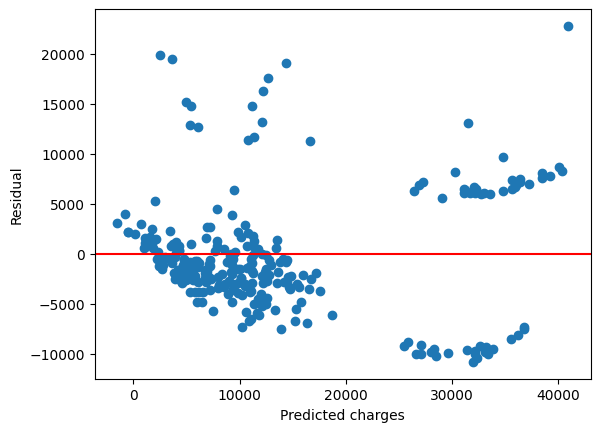

In [20]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted charges")
plt.ylabel("Residual")
plt.axhline(y=0, color='red')


### Metric Used: R² Score

In [21]:
accuracy = r2_score(y_test, y_pred)
print("Accuracy (R²):", accuracy)

Accuracy (R²): 0.7811302113434095
